# Homework
Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

### Dataset
In this homework, we will use the Car price dataset. Download it from here.

Or you can do it with wget:

`wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv`
We'll keep working with the MSRP variable, and we'll transform it to a classification task.

### Features
For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`

### Data preparation
* Select only the features from above and transform their names using next line:
`data.columns = data.columns.str.replace(' ', '_').str.lower()`
* Fill in the missing values of the selected features with 0.
* Rename MSRP variable to price.

In [194]:
# import libraries
import pandas as pd
import numpy as np

import seaborn as sns # for visualization
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
# get the data
data_link = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [25]:
!wget $data_link

--2023-10-02 21:47:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: 'data.csv.1'

data.csv.1          100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2023-10-02 21:47:56 (12.1 MB/s) - 'data.csv.1' saved [1475504/1475504]



In [195]:
# load data set 
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [196]:
columns = [
    'Make', 'Model', 'Year', 
    'Engine HP', 'Engine Cylinders', 
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']

In [197]:
df = data[columns]

In [198]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [199]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [200]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [201]:
df = df.copy().fillna(0)

In [202]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [203]:
df = df.rename(columns = {'msrp': 'price'})

In [204]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [220]:
f = list(df.columns)
f

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

### Question 1
What is the most frequent observation (mode) for the column transmission_type?

* `AUTOMATIC` (*)
* `MANUAL`
* `AUTOMATED_MANUAL`
* `DIRECT_DRIVE`

In [44]:
df.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

* `engine_hp` and `year`
* `engine_hp` and `engine_cylinders`
* `highway_mpg` and `engine_cylinders`
* `highway_mpg` and `city_mpg` (*)

In [45]:
num_features = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [48]:
# automaticly select numeric features
nf = list(df.dtypes[df.dtypes !='object'].index)
print(nf)

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']


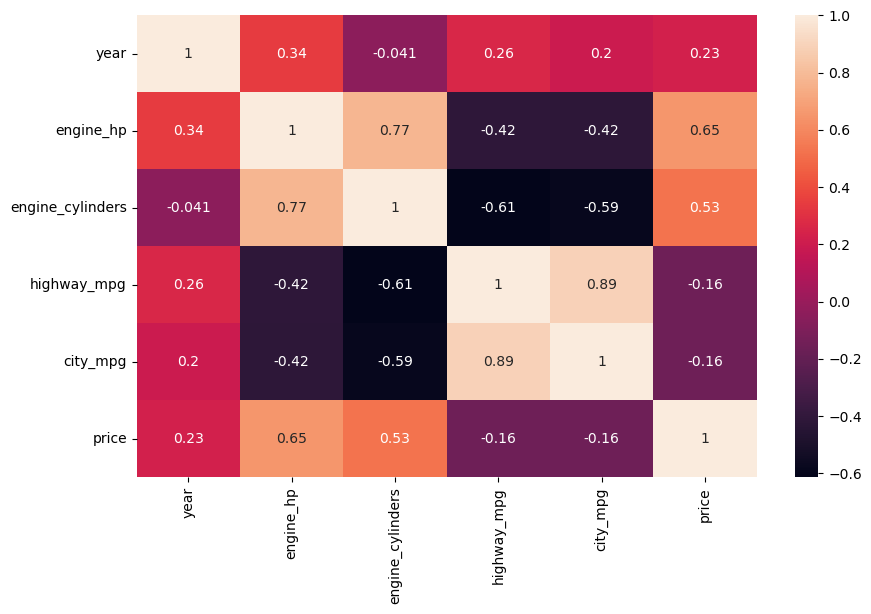

In [49]:
df_num = pd.DataFrame(df,columns=num_features)
fig, ax = plt.subplots(figsize=(10, 6))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Make price binary
* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [50]:
price_mean = df.price.mean()
price_mean

40594.737032063116

In [51]:
above_average = (df.price > price_mean).astype(int)

In [53]:
df.price = above_average

In [54]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


### Split the data
* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price
y_val = df_val.price
y_test = df_test.price

del df_train['price']
del df_val['price']
del df_test['price']

In [62]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [63]:
y_train[:5]

0    0
1    0
2    1
3    0
4    0
Name: price, dtype: int64

### Question 3
* Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
* Round the scores to 2 decimals using round(score, 2).
Which of these variables has the lowest mutual information score?

* `make`
* `model`
* `transmission_type` (*)
* `vehicle_style`

In [66]:
from sklearn.metrics import mutual_info_score

In [67]:
cat_features = list(df_train.dtypes[df_train.dtypes =='object'].index)
cat_features

['make', 'model', 'transmission_type', 'vehicle_style']

In [71]:
for c in cat_features:
    print(c)
    print(round(mutual_info_score(df_train[c], y_train), 2))
    print('----')
    print()

make
0.24
----

model
0.46
----

transmission_type
0.02
----

vehicle_style
0.08
----



In [77]:
def mutual_info_price(series):
    return round(mutual_info_score(series, y_train), 2)

In [78]:
mut_inf = df_train[cat_features].apply(mutual_info_price)
mut_inf.sort_values(ascending=True)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

### Question 4
* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
** To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
** `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
What accuracy did you get?

* 0.60
* 0.72
* 0.84
* 0.95 (*)

In [205]:
from sklearn.feature_extraction import DictVectorizer

In [206]:
train_dicts = df_train[cat_features + num_features].to_dict(orient='records')

In [207]:
train_dicts[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 19,
 'city_mpg': 15}

In [208]:
dv = DictVectorizer(sparse=False)

In [209]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [178]:
# dv.get_feature_names_out()

In [210]:
X_train = dv.fit_transform(train_dicts)

In [211]:
X_train.shape

(7148, 943)

In [212]:
val_dicts = df_val[cat_features + num_features].to_dict(orient='records')

In [213]:
X_val = dv.transform(val_dicts)

In [214]:
X_val.shape

(2383, 943)

In [215]:
test_dicts = df_test[cat_features + num_features].to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [216]:
X_test.shape

(2383, 943)

### Train Logistic Regression

In [96]:
#let let's train Logistic Regression
from sklearn.linear_model import LogisticRegression

In [97]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [179]:
# model.coef_

In [99]:
model.intercept_[0]

-0.08919319779743098

In [100]:
model.predict(X_train)

array([0, 0, 1, ..., 0, 0, 1])

In [101]:
# probability of price more than overage
model. predict_proba(X_train)

array([[9.59086643e-01, 4.09133569e-02],
       [8.98441685e-01, 1.01558315e-01],
       [1.08074782e-04, 9.99891925e-01],
       ...,
       [9.53389405e-01, 4.66105951e-02],
       [9.99548536e-01, 4.51464453e-04],
       [4.39461347e-01, 5.60538653e-01]])

In [102]:
# let's get predictions on validation dataset
y_pred_val = model.predict_proba(X_val)[:, 1]
y_pred_val

array([0.00873386, 0.99033286, 0.00157436, ..., 0.00145955, 0.97179501,
       0.96248245])

In [103]:
higher_price = (y_pred_val >= 0.5)

In [104]:
higher_price.astype(int)

array([0, 1, 0, ..., 0, 1, 1])

In [108]:
# check the accuracy on the validation dataset
acc_val = (y_val == higher_price).mean()

In [109]:
print(round(acc_val, 2))

0.93


### Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
Which of following feature has the smallest difference?

* `year`
* `engine_hp` (*)
* `transmission_type`
* `city_mpg`

Note: the difference doesn't have to be positive

#### Load data

In [256]:
# load data set 
data = pd.read_csv('data.csv')
selected_columns = [
    'Make', 'Model', 'Year', 
    'Engine HP', 'Engine Cylinders', 
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data = data[sel_columns]
data.columns = data.columns.str.replace(' ', '_').str.lower()
df = data.copy().fillna(0)
df = df.rename(columns = {'msrp': 'price'})

### Transform price columns to binary

In [257]:
price_mean = df.price.mean()
above_average = (df.price > price_mean).astype(int)
df.price = above_average

### Split Data

In [258]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.price
y_val = df_val.price
y_test = df_test.price

del df_train['price']
del df_val['price']
del df_test['price']

### Feature elimination technique

In [259]:
from sklearn.metrics import mutual_info_score
def mutual_info_median_price(series):
    return mutual_info_score(series, df['price'])

In [260]:
import warnings
warnings.filterwarnings('ignore')

mi = df.apply(mutual_info_median_price)
mi.sort_values(ascending=False)

price                0.587570
model                0.457469
engine_hp            0.361682
make                 0.237731
engine_cylinders     0.114565
vehicle_style        0.082633
year                 0.073390
city_mpg             0.058187
highway_mpg          0.042990
transmission_type    0.019954
dtype: float64

### Form list of features for train/val/test

In [261]:
full_features = ['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']


In [285]:
# created list of list that contain one less feature
less_features = []
for i in range(len(full_features)):
    less_features.append(full_features[:i] + full_features[i+1:])

In [287]:
less_features[1]

['make',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

In [295]:
len(less_features)

9

### Encode data and implement Logistic Regression

In [264]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [265]:
#train the model and try to find less useful feature
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [266]:
more_than_average = (y_pred > 0.5) 
more_than_average.mean()

0.278220730172052

In [300]:
clas_accuracy = []
for i in range(len(less_features)):
    train_dict = df_train[less_features[i]].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[less_features[i]].to_dict(orient='records')
    X_val = dv.transform(val_dict)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    more_than_average = (y_pred > 0.5) 
    df_pred = pd.DataFrame()
    df_pred['probability'] = y_pred
    df_pred['prediction'] = more_than_average.astype(int)
    df_pred['actual'] = y_val
    df_pred['correct'] = (df_pred['prediction'] == df_pred['actual'])
    clas_accuracy.append(df_pred.correct.mean())
print(clas_accuracy)

[0.9437683592110785, 0.9160721779269828, 0.9471254720939991, 0.9303399076793957, 0.946286193873269, 0.9458665547629039, 0.9282417121275703, 0.9467058329836341, 0.946286193873269]


In [301]:
df_pred

,probability,prediction,actual,correct
0,0.000631,0,0,True
1,0.996349,1,1,True
2,0.000080,0,0,True
3,0.278282,0,0,True
4,0.001277,0,0,True
...,...,...,...,...
2378,0.002067,0,0,True
2379,0.001283,0,0,True
2380,0.000409,0,0,True
2381,0.992863,1,1,True


In [269]:
#import accuracy
from sklearn.metrics import accuracy_score

In [276]:
y_predv = model.predict(X_val)
score_fullset = accuracy_score(y_val,y_predv)
score_fullset

0.9345362987830466

The accuracy for the model with all features 0.93. Now let's try to train the model with 1 feature excluded and check results

In [302]:
difference = abs((np.array(clas_accuracy) - score_fullset)).min()
difference

0.004196391103650887

In [303]:
diff = abs(np.array(clas_accuracy) - score_fullset)
diff

array([0.00923206, 0.01846412, 0.01258917, 0.00419639, 0.0117499 ,
       0.01133026, 0.00629459, 0.01216953, 0.0117499 ])

In [304]:
diff.argmin()

3

In [306]:
list(set(full_features) - set(less_features[3]))

['engine_hp']

### Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column price. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
* This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
* Round your RMSE scores to 3 decimal digits.
Which of these alphas leads to the best RMSE on the validation set?

* 0 (*)
* 0.01
* 0.1
* 1
* 10
Note: If there are multiple options, select the smallest `alpha`.



In [152]:
# load data set 
data = pd.read_csv('data.csv')
sel_columns = [
    'Make', 'Model', 'Year', 
    'Engine HP', 'Engine Cylinders', 
    'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data = data[sel_columns]
data.columns = data.columns.str.replace(' ', '_').str.lower()
df = data.copy().fillna(0)
df = df.rename(columns = {'msrp': 'price'})

In [153]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [165]:
df.isna().sum()
#df = df.fillna(0)

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

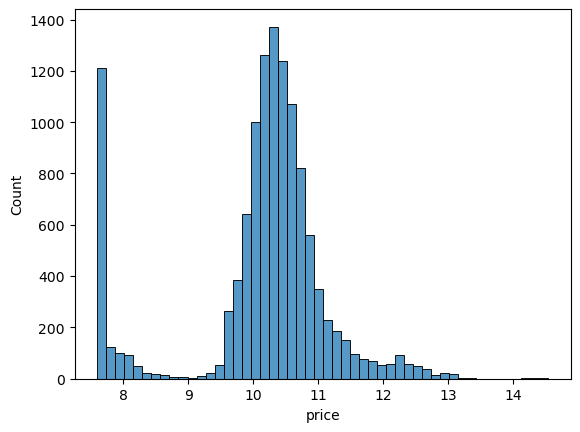

In [166]:
prices_log = np.log1p(df['price'])
prices_log

sns.histplot(prices_log, bins=50)

In [167]:
features = list(df.columns)[:-1]
features

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg']

### Split data

In [168]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train['price'])
y_val = np.log1p(df_val['price'])
y_test = np.log1p(df_test['price'])

del df_train['price']
del df_val['price']
del df_test['price']

### One-hot encoding

In [169]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

### Train model

In [170]:
from sklearn.linear_model import Ridge

In [171]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [172]:
a = [0, 0.01, 0.1, 1, 10]

for i in a:
    model = Ridge(alpha=i, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    score = rmse(y_val, y_pred)
    print(score)

0.4940098299300926
0.4940099838768784
0.49401136935655493
0.4940252207146744
0.4942504097475157


The better RMSE we get when a = 0